# Birthday paradox (also called bithday problem)

How many people we need in a room to have a 50% chance that two people have the same birthday?

The answer is very surprising! It goes against our intuition, so it is why we call it the **birthday paradox**.

For simplicity, we'll assume that:
* leap years don't exist
* there are no twins
* all 365 possible bithdays are equally likely

To get an intuition of the answer, let's do some simulations.

In [2]:
# library to generate random numbers
import random

# library to plot results
import matplotlib.pyplot as plt

# load math libraries
from scipy.special import binom
import math

%matplotlib inline

plt.rcParams['figure.figsize'] = [18, 9]
plt.rcParams.update({'font.size':18})

In [131]:
# As we assumed that there is the same probability for each possible birthday date, we can generate
# a random number x such as 1 <= x <= 365
def get_random_birthday_dates(n):
    """function that returns n random birthday dates"""
    return [random.randint(1,365) for i in range(n)]

In [132]:
def generate_samples(sample_size, number_samples):
    """function that generates a list of samples given the sample size 
    and the number of samples wanted"""
    return [get_random_birthday_dates(sample_size) for i in range(number_samples)]

In [133]:
def there_is_same_birthday_twice(sample):
    """Given a sample of random numbers between 1 and 365 representing birthday dates,
    returns True if there is the same birthday date at least twice, False otherwise"""
    there_is_same_birthday_twice = False
    counter = 0
    while (counter < len(sample)) and (not there_is_same_birthday_twice):
        if sample.count(sample[counter]) > 1:
            there_is_same_birthday_twice = True
        else:
            counter += 1
    return there_is_same_birthday_twice

So now we have these functions, a good way to get an intuition of the result is to generate a lot of samples for various n. Then, we'll plot the probability evolution and see the value to which it converges.

In [134]:
def get_prob_evolution(sample_results):
    prob_evolution = []
    for i in range(1, len(sample_results) + 1):
        # to estimate the probability there is the same birthday twice given a set of samples
        # we count how many times there has been the same birthday date divided by the number
        # of samples considered until now
        # So for example if we have 4 samples and in 2 of them, there is the same birthday date 
        # twice, the estimate probability will be 0.5
        current_prob = sample_results[:i].count(True) / len(sample_results[:i])
        prob_evolution.append(current_prob)
    return prob_evolution

In [151]:
def plot_prob_evolutions(dict_evolutions):
    for sample_size, prob_evolution in dict_evolutions.items():
        plt.plot(prob_evolution, linewidth=3, label='number of people: {}'.format(sample_size))
    plt.hlines(0.5, 0, len(prob_evolution), linestyles='dashed', colors='r', 
               label='50% success rate')
    plt.ylim(0,1)
    plt.xlabel('Number of trials')
    plt.ylabel('Success rate')
    plt.legend()


Thanks to these two functions, we'll be able to visualize the probability evolution for various sample sizes. It will give us an idea of the probability if we take a large number of samples.

In [152]:
def get_various_prob_evolutions(different_n, sample_size):
    """Given various numbers of people in the room (n) and a standard sample size, 
    generate probability evolutions"""
    # create a dictionnary with:
    # - the key equals to the sample size
    # - the value equals to prob evolution
    dict_evolutions = {}
    for n in different_n:
        # generate samples
        samples = generate_samples(n, sample_size)
        # get the list of booleans for each sample, True if the sample contains two people 
        # having the same birthday, False otherwise
        same_birthday_twice = [there_is_same_birthday_twice(sample) for sample in samples]
        # get probability evolution trial after trial
        dict_evolutions[n] = get_prob_evolution(same_birthday_twice)
    return dict_evolutions

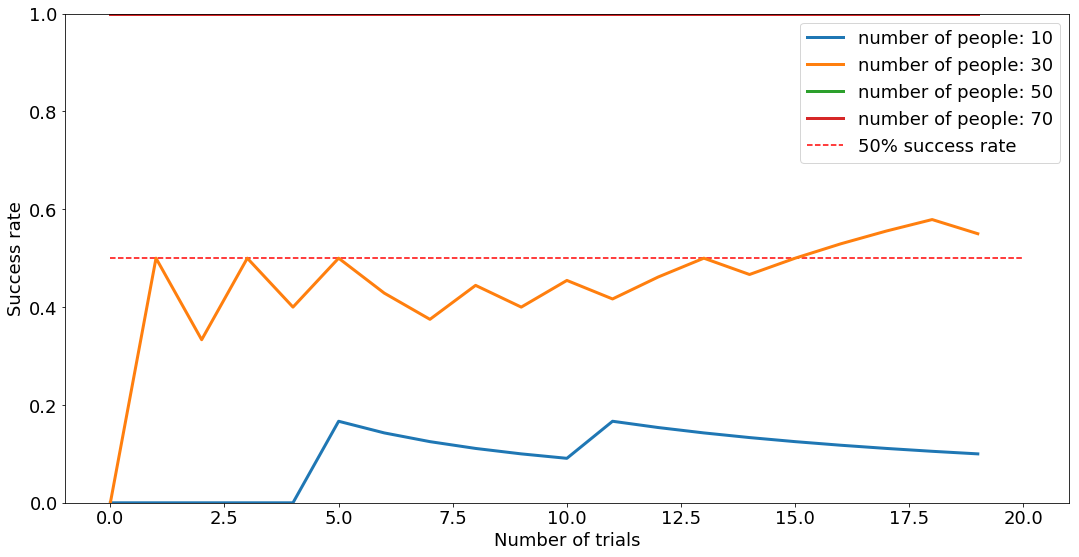

In [157]:
prob_evolutions = get_various_prob_evolutions(range(10, 80, 20), 20)
plot_prob_evolutions(prob_evolutions)

Intuitively you may have fought that to have p=0.5, we need n > 50. Yet this graph shows that with 50 people in a room, the success race is 100%. Although, we have a small number of samples, we already have an idea of the answer. The answer may be closer of 20 than 50.
Let's figure that out more precisely.

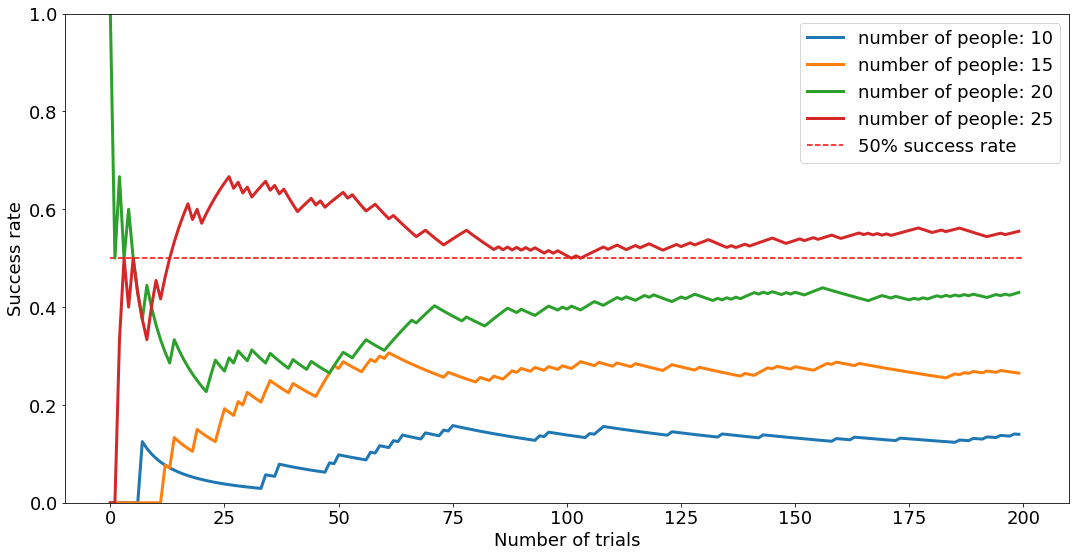

In [156]:
prob_evolutions = get_various_prob_evolutions(range(10, 30, 5), 200)
plot_prob_evolutions(prob_evolutions)

The more we repeat, the more balanced our results will be. That is the law of large numbers in action.

To be extremely accurate there is no choice but to do some fancy maths!

So we want to compute $p(A)$, the probability that two people in the room have the same birthday. But wouldn't it be simpler to compute $p(\bar{A})$ the probability that no two people have the same birthday? It is!

$A$ and $\bar{A}$ are mutually exclusive. So that we have: $$p(A) = 1 - p(\bar{A}), A \cap \bar{A} = \emptyset$$

If we had 2 people, we would have:
$$p(A) = \frac{1}{365} \Rightarrow p(\bar{A}) = 1 - \frac{1}{365} = \frac{364}{365}$$

Because there only is 1 possible day out of 365 so that they have the same birthday.

Moreover, as it is a conditional probability problem, we eventually have: 

\begin{equation}
\begin{split}
p(\bar{A}) & = (1 - \dfrac{1}{365})  \times (1 - \dfrac{2}{365})  \times  ...   \times  (1 - \dfrac{n-1}{365}) \\
 & = \dfrac{365 \times 364 \times  ...  \times (365 - n + 1)}{365^n} \\
 & = \dfrac{365!}{365^n(365 - n)!} \\
 & = \dfrac{n! \binom{365}{n}}{365^n}
\end{split}
\end{equation}

So it's now time to compute this for various n and print the results.

In [10]:
def compute_prob_contrary_event(n):
    return (math.factorial(n) * binom(365, n)) / 365**n

In [11]:
def compute_prob_event(n):
    return 1 - compute_prob_contrary_event(n)

In [23]:
def plot_probability_for_various_n(probabilities):
    plt.plot(list(probabilities.keys()), list(probabilities.values()))
    plt.hlines(0.5, 0, len(probabilities), linestyles='dashed', colors='r')
    plt.ylabel('p(A)')
    plt.xlabel('n (number of people in the room)')
    plt.title('Probability p(A) depending on the number of people in the room')

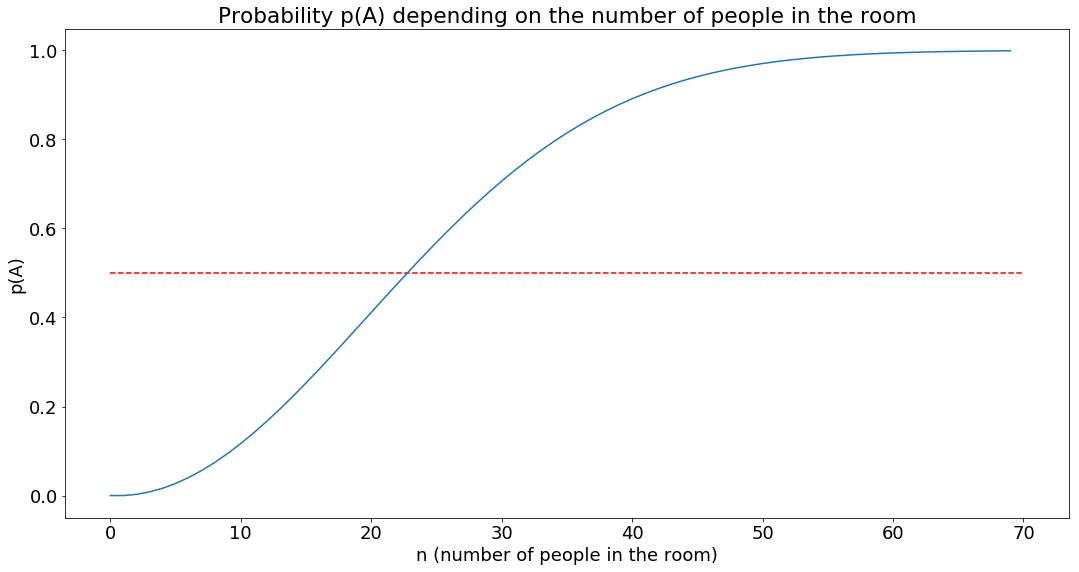

In [25]:
# compute the probability for each n from 0 to 70
probs = {n:compute_prob_event(n) for n in range(0,70,1)}
plot_probability_for_various_n(probs)

We are close! Looks like the exact n is between 20 and 25. A calculus shows that the number of people we need in a room to have a probality greater than 0.5 is **23**.